In [2]:
from langgraph.graph import StateGraph, START, END
from typing import TypedDict
import os
from dotenv import load_dotenv
load_dotenv()


# Cricket Stats calculate

True

In [3]:
# State

class PlayerState(TypedDict):
    runs : int
    balls : int
    fours : int
    sixes : int
    strike_rate : float
    boundary_percent : float
    balls_per_boundary : float
    summary : str

In [24]:
def calc_sr(state : PlayerState)-> PlayerState:
    # runs = state["runs"]
    # balls = state["balls"]

    sr = (state["runs"]/float(state["balls"])) * 100
    return {"strike_rate": sr}

def calc_boundary_perc(state : PlayerState)-> PlayerState:
    """ perc of score earned by boundaries"""
    boundary_scores = state["fours"]*4 + state["sixes"]*6

    boundary_perc = (boundary_scores / float(state["balls"]))*100
    return {"boundary_percent":boundary_perc}

def calc_bpb(state : PlayerState)-> PlayerState:
    boundaries = state["fours"] + state["sixes"]

    balls_per_boundary = state["balls"]/ float( boundaries)
    return {"balls_per_boundary": balls_per_boundary}

def summarize(state : PlayerState)-> PlayerState:
    summary = f"SR : {state["strike_rate"]}, boundary_perc : {state['boundary_percent']}, bpb : {state['balls_per_boundary']}"
    
    state["summary"] = summary
    return state

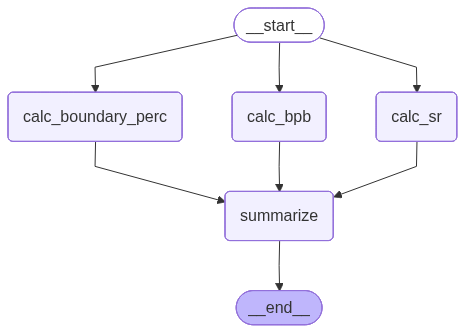

In [25]:
# Graph 

graph = StateGraph(state_schema= PlayerState)

graph.add_node("calc_sr", calc_sr)
graph.add_node("calc_boundary_perc", calc_boundary_perc)
graph.add_node("calc_bpb", calc_bpb)
graph.add_node("summarize", summarize)

# Adding parallel edges
graph.add_edge(START, "calc_sr")
graph.add_edge(START, "calc_boundary_perc")
graph.add_edge(START, "calc_bpb")

# Adding aggregate edges
graph.add_edge("calc_sr","summarize")
graph.add_edge("calc_boundary_perc","summarize")
graph.add_edge("calc_bpb","summarize")

graph.add_edge("summarize", END)

workflow = graph.compile()
workflow

In [26]:
stats = input("Enter runs, balls, 4's, 6's in a line : ")
stats = list(map(int,stats.split(" ")))

init_state = {
    "runs": stats[0],
    "balls": stats[1],
    "fours": stats[2],
    "sixes": stats[3],
}
init_state

{'runs': 535, 'balls': 276, 'fours': 10, 'sixes': 10}

In [27]:
final_state = workflow.invoke(init_state)

print(final_state["summary"])

SR : 193.84057971014494, boundary_perc : 36.231884057971016, bpb : 13.8


In [28]:
final_state

{'runs': 535,
 'balls': 276,
 'fours': 10,
 'sixes': 10,
 'strike_rate': 193.84057971014494,
 'boundary_percent': 36.231884057971016,
 'balls_per_boundary': 13.8,
 'summary': 'SR : 193.84057971014494, boundary_perc : 36.231884057971016, bpb : 13.8'}